In [1]:
cd ..

/home/araxal/coursework


In [2]:
import numpy as np
import torch
from torch import nn
from utils.genre_classification import evaluate, executor
from utils.decade_classification import feature_preparator
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardModel import FeedForwardModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
BATCH_SIZE = 8
NUM_CLASSES = 4
DEVICE = torch.device('cuda')

In [6]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/decade_classification/vggish.p',
    BATCH_SIZE,
    normalize=False
)

def transform_idx_to_label(x):
    return idx_to_label[x]

CPU times: user 3.67 ms, sys: 3.96 ms, total: 7.63 ms
Wall time: 7.62 ms


In [7]:
next(iter(train_data_loader))[0].shape

torch.Size([8, 20, 128])

In [8]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3]), array([245, 238, 223, 246]))
Val (array([0, 1, 2, 3]), array([51, 51, 46, 52]))
Test (array([0, 1, 2, 3]), array([49, 50, 48, 53]))
{0: '1990', 1: '2000', 2: '2010', 3: 'old'}


## Перцептрон

 17%|█▋        | 17/100 [00:07<00:38,  2.15it/s]

Early stop!


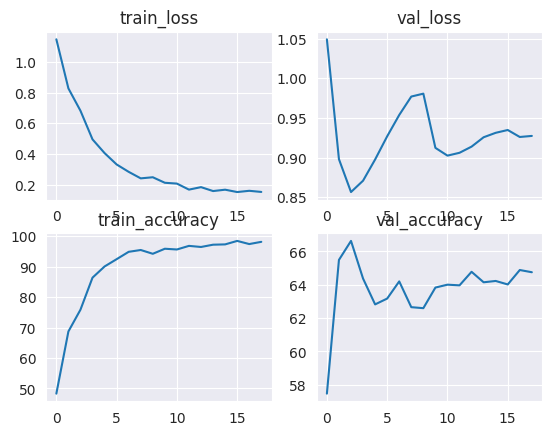

In [9]:
ff_simple_model = FeedForwardModel(20 * 128, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.71      0.68      0.69        53
        2000       0.63      0.62      0.63        50
        2010       0.62      0.67      0.65        46
         old       0.82      0.80      0.81        51

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.69      0.70       200



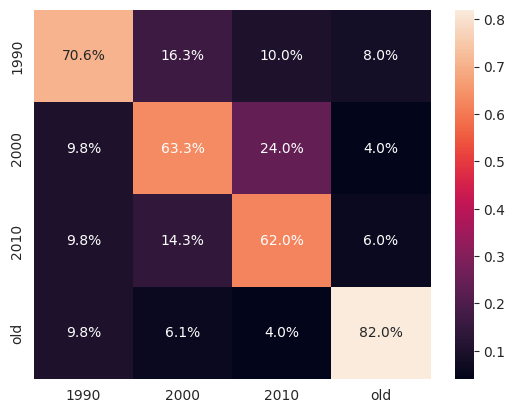

In [10]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени

 32%|███▏      | 32/100 [00:36<01:18,  1.16s/it]

Early stop!


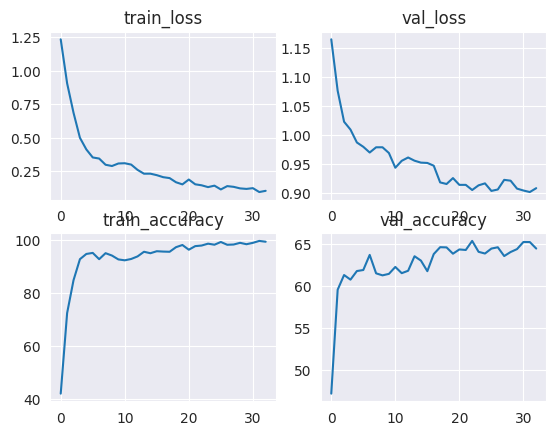

In [11]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=20, feature_size=128).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.71      0.58      0.64        50
        2000       0.52      0.45      0.48        51
        2010       0.69      0.72      0.70        46
         old       0.69      0.87      0.77        53

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.66      0.65       200



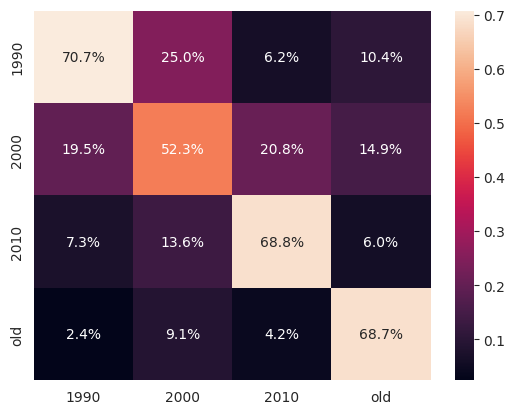

In [12]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по фичам

 28%|██▊       | 28/100 [00:22<00:56,  1.27it/s]

Early stop!


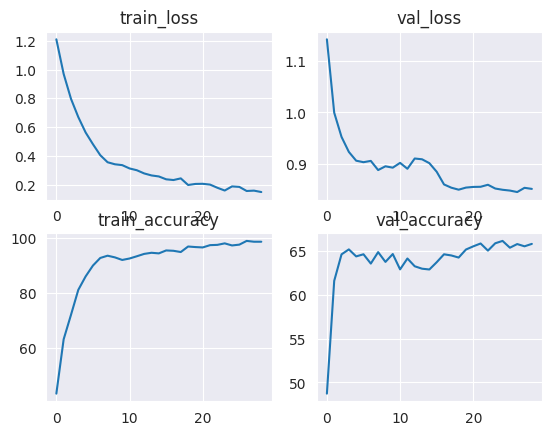

In [13]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 128, 20).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.60      0.77      0.67        52
        2000       0.56      0.46      0.51        50
        2010       0.76      0.66      0.71        44
         old       0.83      0.83      0.83        54

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.68       200



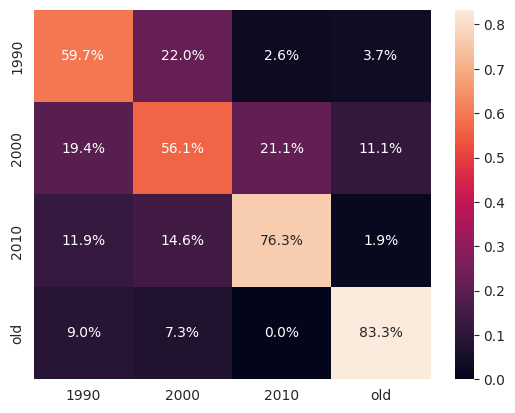

In [14]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## LSTM

 68%|██████▊   | 68/100 [00:34<00:16,  1.97it/s]

Early stop!


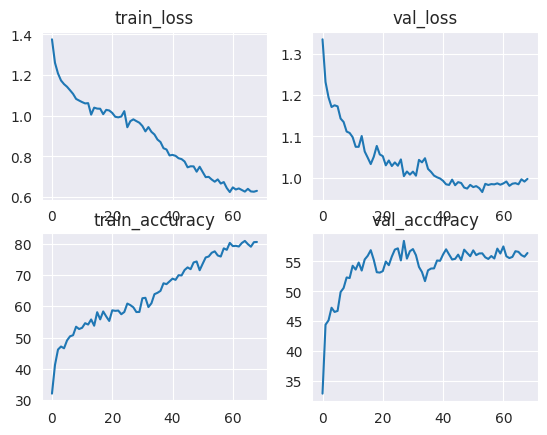

In [15]:
from models.genre_classification.LSTMModel import LSTMModel

lstm_simple_model = LSTMModel(128, 256, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=1e-4, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.61      0.53      0.57        53
        2000       0.54      0.60      0.57        48
        2010       0.68      0.55      0.61        47
         old       0.69      0.83      0.75        52

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



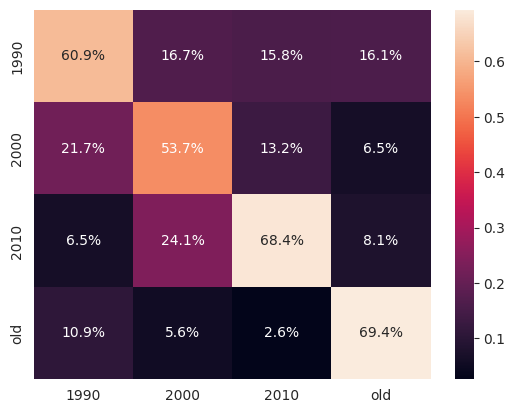

In [16]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Трансформер

 28%|██▊       | 56/200 [01:36<04:09,  1.73s/it]

Early stop!


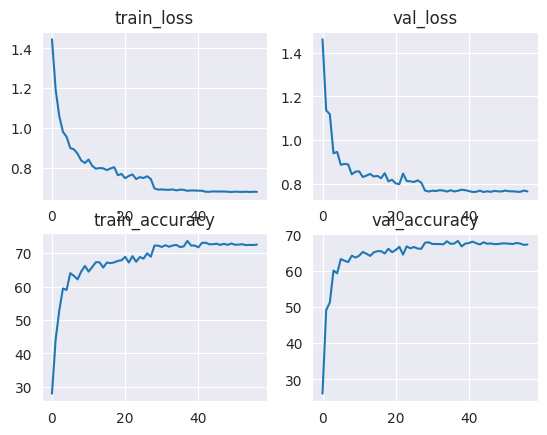

In [17]:
from models.genre_classification.TransformerModel import TransformerModel

transformer_model = TransformerModel(
    input_dim=128,
    num_layers=6,
    output_dim=NUM_CLASSES,
    num_heads=16,
    dropout=0.1,
    hidden_dim=512
).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=200,
    learning_rate=0.0001,
    weight_decay=0.1,
    evaluate_per_iteration=10,
    early_stop_after=(15,  0.001),
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.63      0.71      0.67        52
        2000       0.58      0.57      0.58        49
        2010       0.83      0.76      0.80        46
         old       0.82      0.79      0.81        53

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



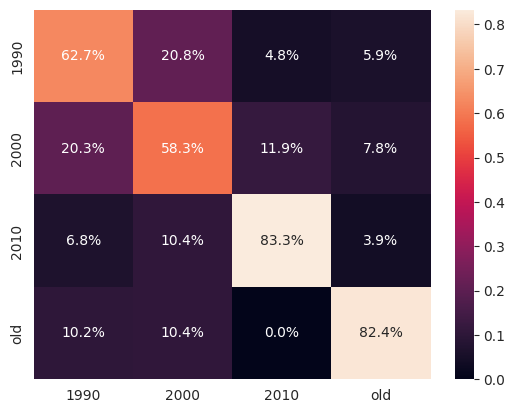

In [18]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)